In [20]:
# Basic Libraries
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# warnings removal
import warnings
warnings.filterwarnings("ignore")

# Preprocessing

In [2]:
data = pd.read_csv('./Data/iniDataset.csv')

In [3]:
data.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [4]:
print('data missing values: ', data.isna().sum().sum())

data missing values:  0


In [5]:
print('unique target values: ', data.Disease.unique())

unique target values:  ['Healthy' 'Diabetes' 'Thalasse' 'Anemia' 'Thromboc' 'Heart Di']


In [6]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.74,0.65,0.71,0.87,0.69,0.53,0.29,0.63,0.00,0.80,...,0.50,0.22,0.51,0.06,0.61,0.94,0.10,0.47,0.77,Healthy
1,0.12,0.02,0.94,0.91,0.51,0.40,0.16,0.31,0.21,0.51,...,0.86,0.65,0.11,0.94,0.34,0.67,0.66,0.82,0.40,Diabetes
2,0.45,0.12,0.54,0.40,0.29,0.38,0.63,0.30,0.87,0.03,...,0.47,0.39,0.42,0.01,0.51,0.43,0.42,0.80,0.78,Thalasse
3,0.14,0.02,0.42,0.19,0.08,0.17,0.07,0.67,0.13,0.50,...,0.02,0.04,0.83,0.27,0.59,0.23,0.49,0.64,0.35,Anemia
4,0.18,0.75,0.97,0.79,0.44,0.44,0.89,0.44,0.26,0.81,...,0.43,0.15,0.22,0.02,0.57,0.84,0.15,0.79,0.09,Thalasse


In [ ]:
data.shape 

(2837, 25)

In [7]:
data.Disease.value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

In [8]:
data.Disease = data.Disease.astype('category')
d = dict(enumerate(data['Disease'].cat.categories))
data.Disease = data.Disease.cat.codes.values
data.Disease

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

Text(0.5, 1.0, 'Correlation Heatmap')

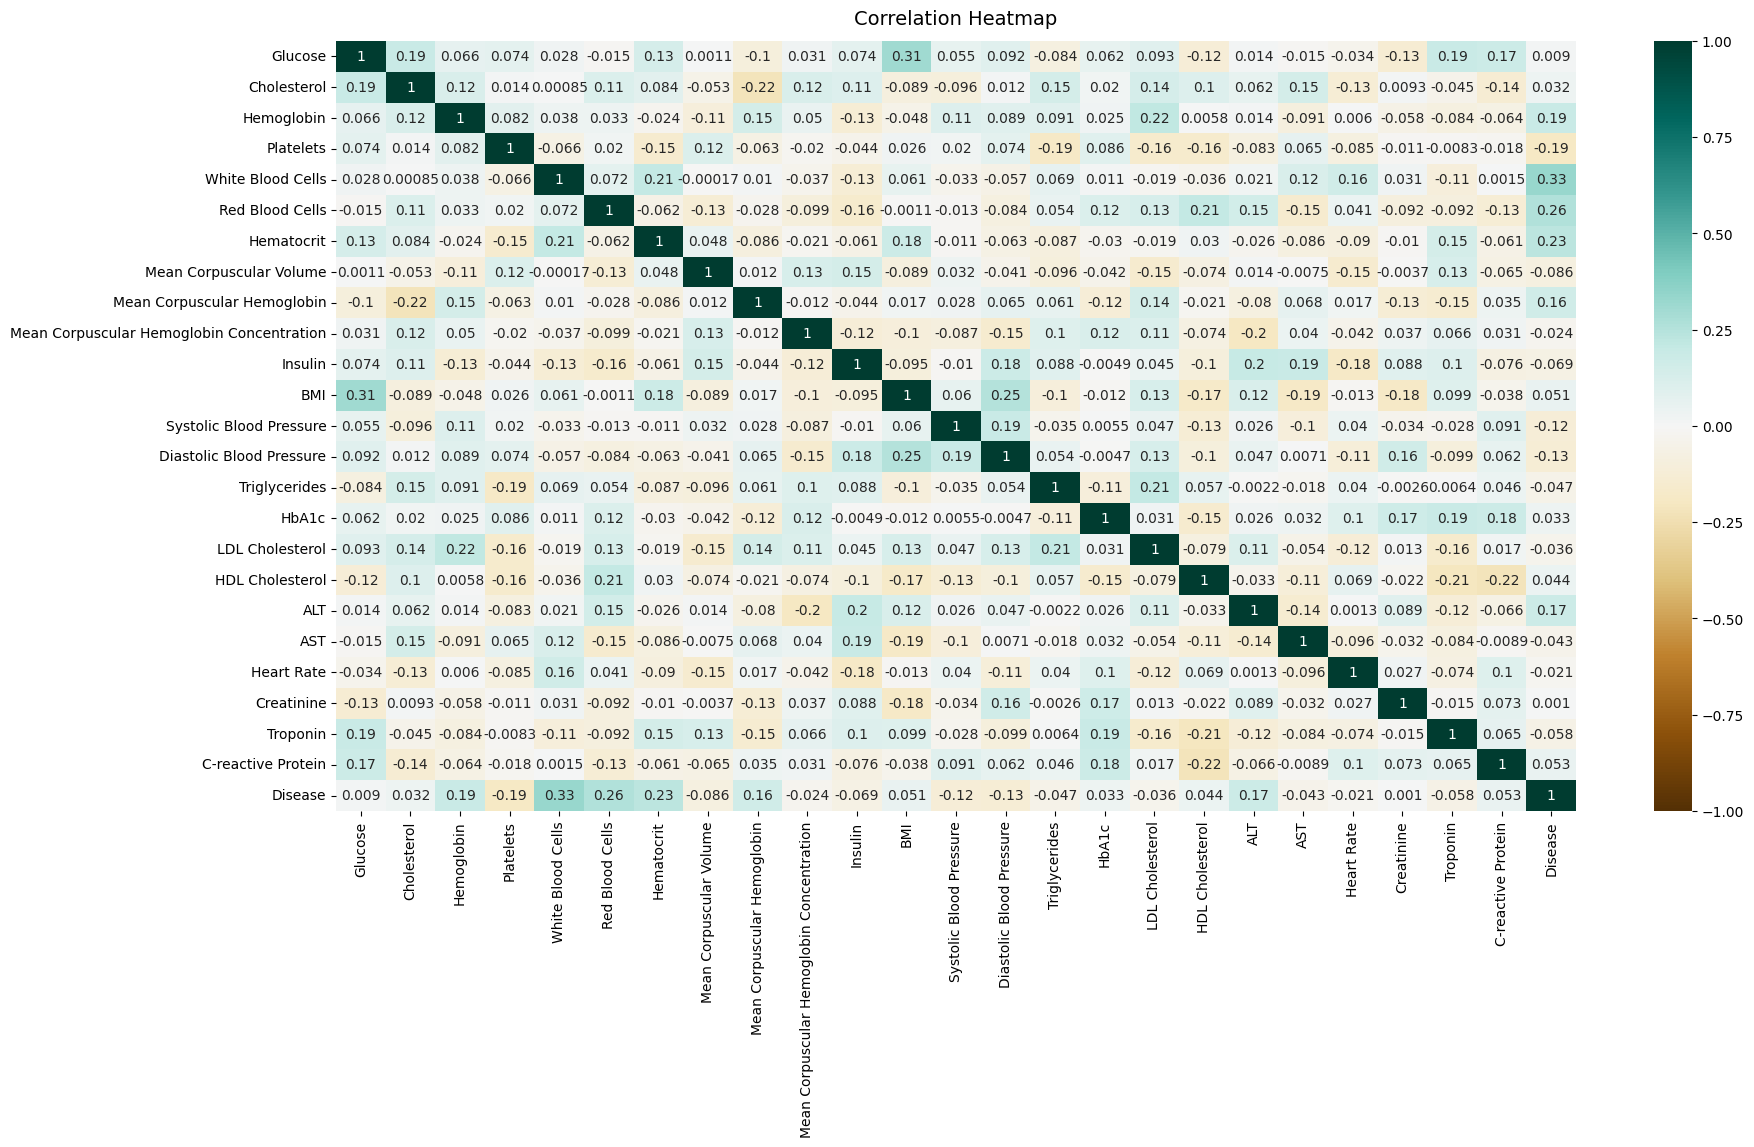

In [9]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)

2: Healty  
1: Diabetes
4: Thalasse  
0: Anemia  
5: Thromboc  
3: Heart Di

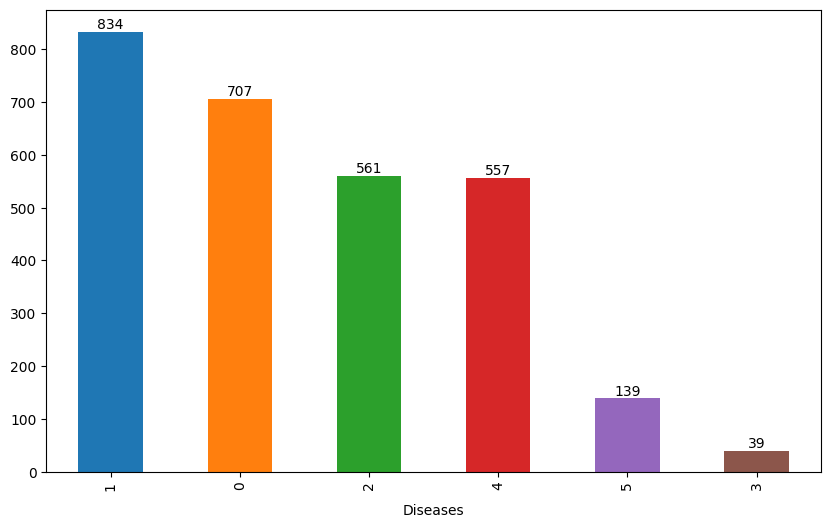

In [10]:
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10, 6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases', labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

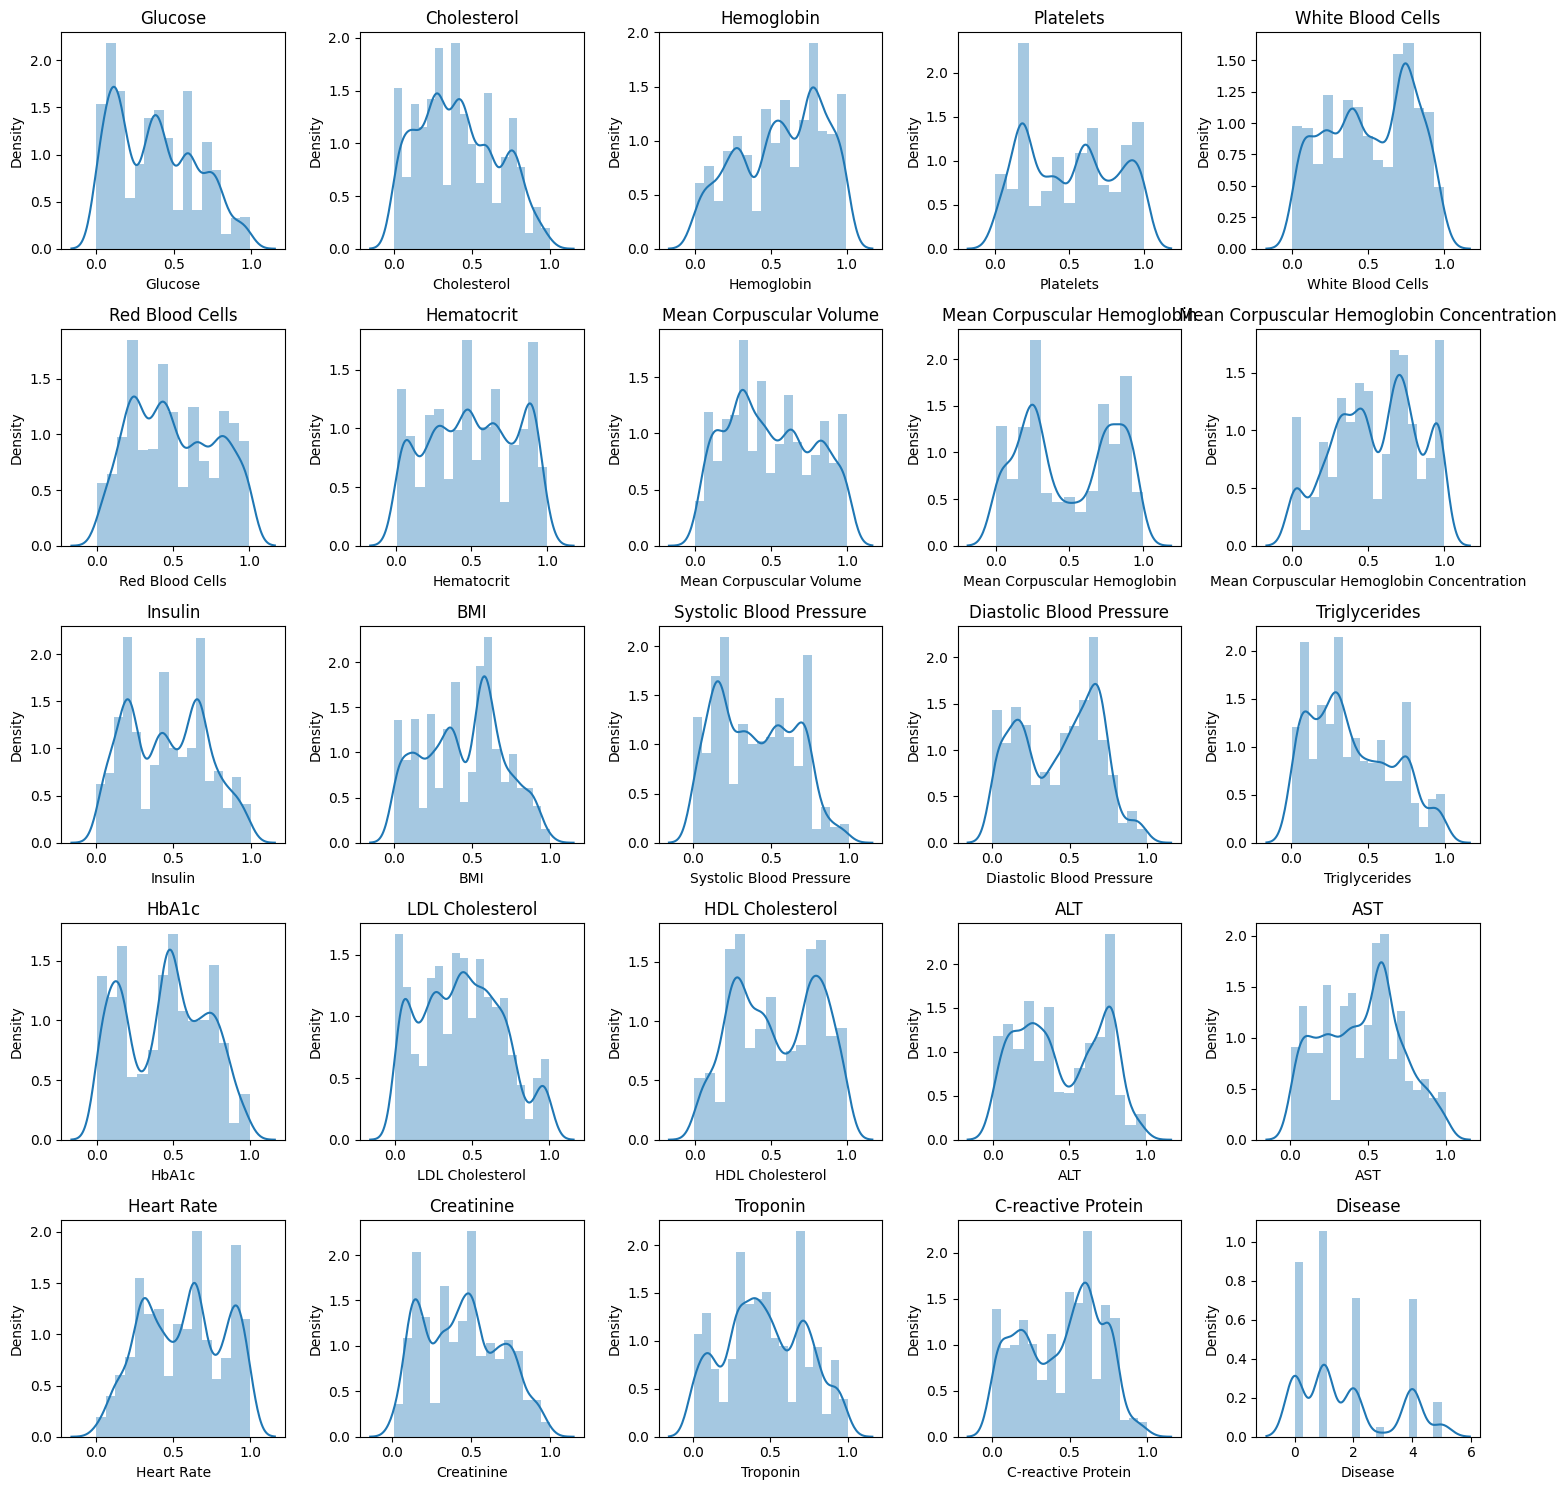

In [11]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))

for i, col in enumerate(data.columns):
    sns.distplot(data[col], ax=axs[i//5, i % 5])
    axs[i//5, i % 5].set_title(col)

for i in range(len(data.columns), 25):
    axs[i//5, i % 5].axis('off')

plt.tight_layout()
plt.show()

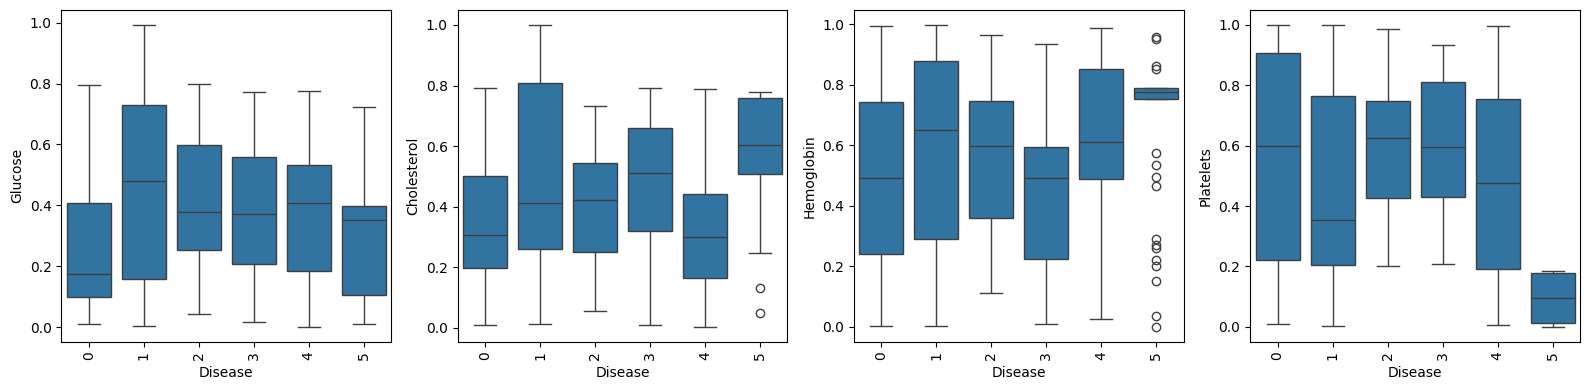

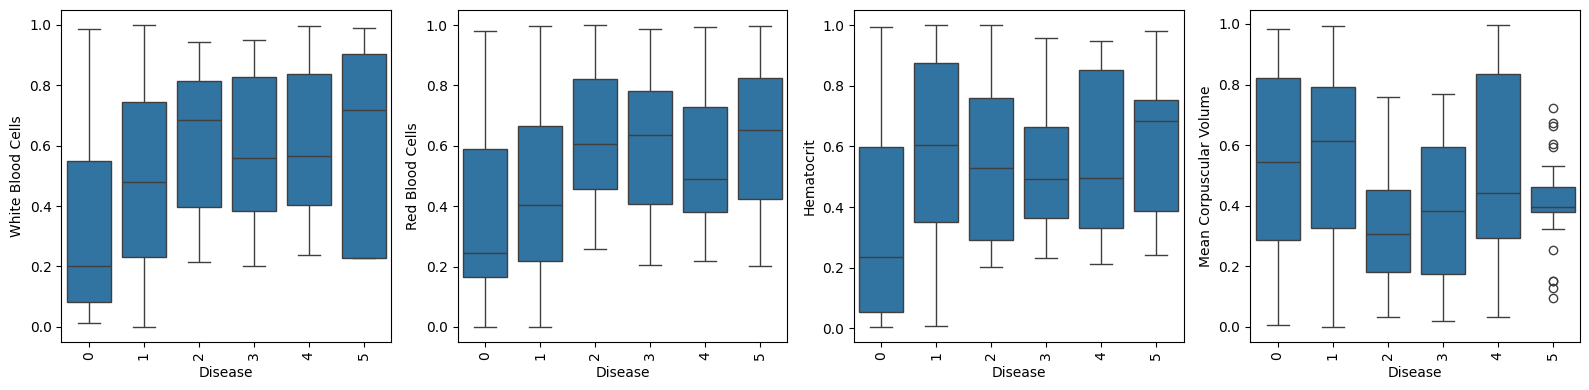

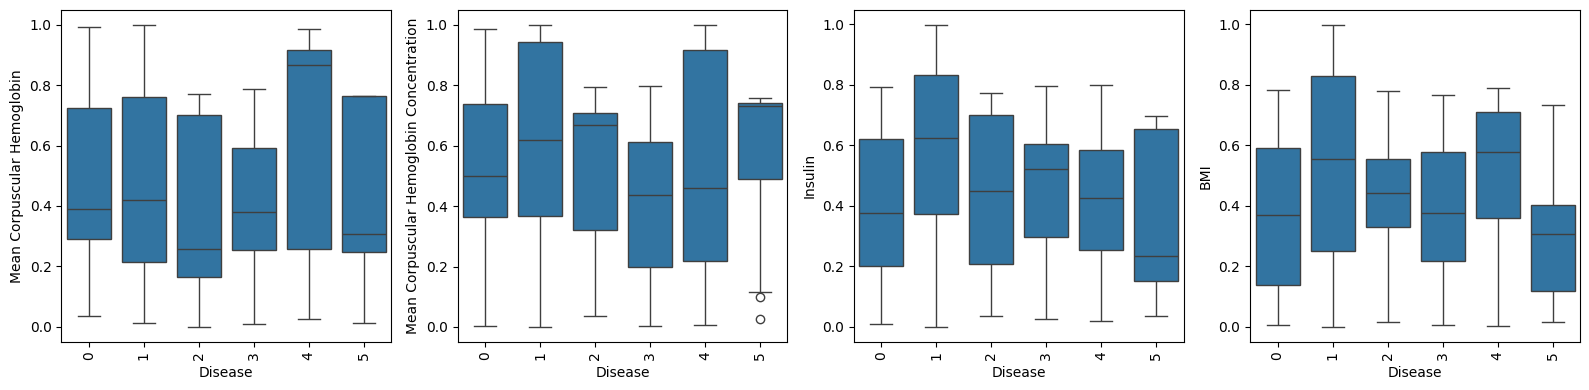

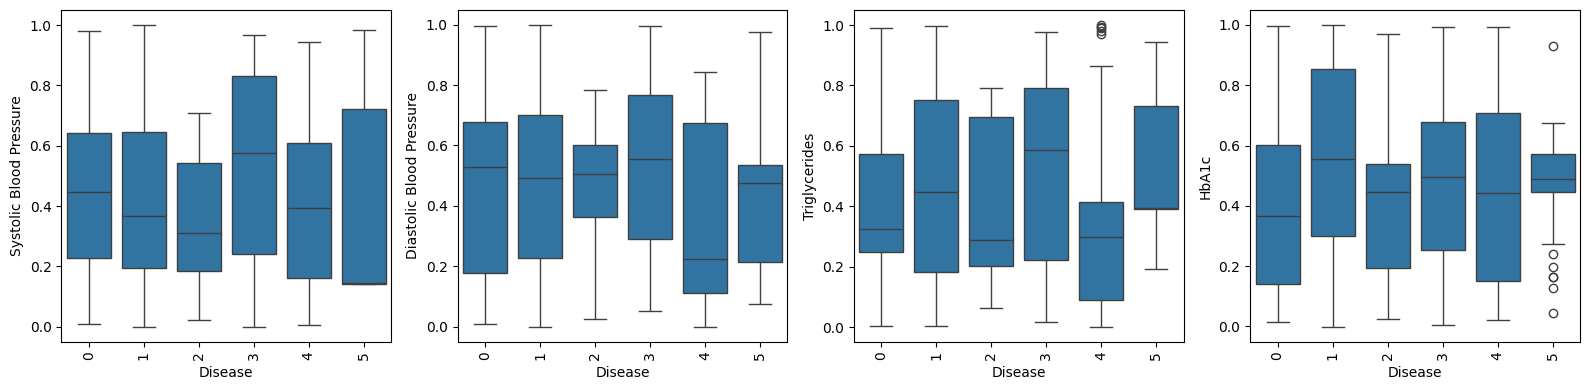

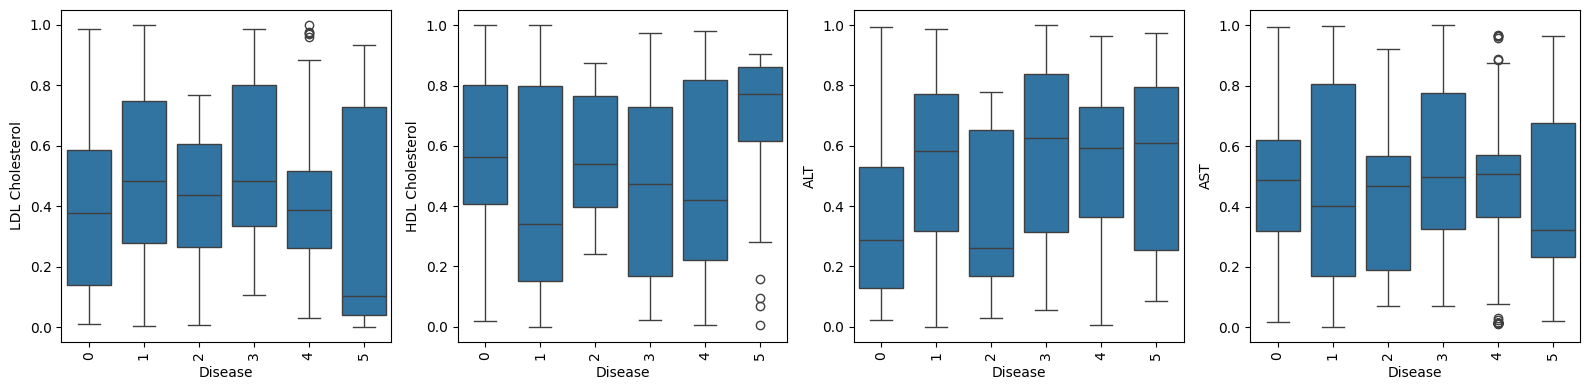

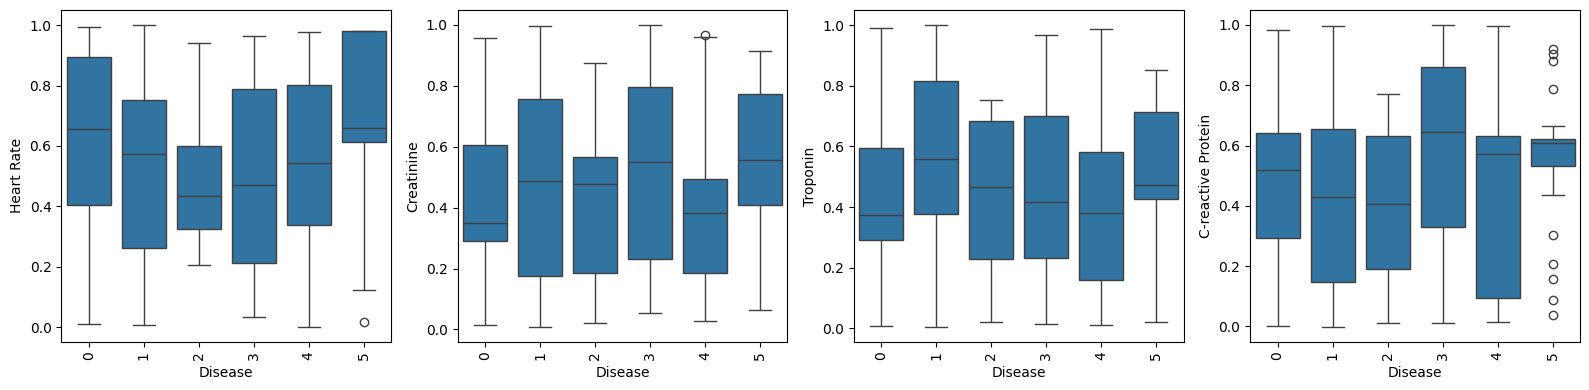

In [12]:
index = 0
for i in range(0, len(data.columns) - 1, 4):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
    for j, ax in enumerate(axes.flat):
        if index < len(data.columns) - 1:
            sns.boxplot(
                data=data, x=data.columns[-1], y=data.columns[index], ax=ax)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
            index += 1
    plt.tight_layout()
    plt.show()

In [13]:
data['Hemoglobin'].describe()

count   2837.00
mean       0.57
std        0.28
min        0.00
25%        0.33
50%        0.60
75%        0.79
max        1.00
Name: Hemoglobin, dtype: float64

In [14]:
X = data.drop('Disease', axis=1)
y = data['Disease']

In [15]:
X

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.74,0.65,0.71,0.87,0.69,0.53,0.29,0.63,0.00,0.80,...,0.65,0.50,0.22,0.51,0.06,0.61,0.94,0.10,0.47,0.77
1,0.12,0.02,0.94,0.91,0.51,0.40,0.16,0.31,0.21,0.51,...,0.48,0.86,0.65,0.11,0.94,0.34,0.67,0.66,0.82,0.40
2,0.45,0.12,0.54,0.40,0.29,0.38,0.63,0.30,0.87,0.03,...,0.09,0.47,0.39,0.42,0.01,0.51,0.43,0.42,0.80,0.78
3,0.14,0.02,0.42,0.19,0.08,0.17,0.07,0.67,0.13,0.50,...,0.41,0.02,0.04,0.83,0.27,0.59,0.23,0.49,0.64,0.35
4,0.18,0.75,0.97,0.79,0.44,0.44,0.89,0.44,0.26,0.81,...,0.41,0.43,0.15,0.22,0.02,0.57,0.84,0.15,0.79,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.99,0.41,0.53,0.26,0.43,0.20,0.58,0.70,0.25,0.25,...,0.76,0.68,0.05,0.47,0.07,0.97,0.02,0.44,0.20,0.82
2833,0.58,0.63,0.49,0.90,0.35,0.63,0.70,0.52,0.67,0.80,...,0.80,0.26,0.48,0.80,0.81,0.33,0.83,0.78,0.42,0.84
2834,0.07,0.40,0.59,0.23,0.13,0.03,0.85,0.28,0.58,0.16,...,0.03,0.17,0.76,0.68,0.89,0.64,0.56,0.80,0.67,0.12
2835,0.90,0.43,0.24,0.83,0.49,0.73,0.66,0.45,0.35,0.34,...,0.37,0.89,0.50,0.11,0.55,0.21,0.94,0.46,0.86,0.66


In [16]:
y

0       2
1       1
2       4
3       0
4       4
       ..
2832    1
2833    3
2834    0
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int8

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=111, stratify=y)

In [18]:
print('train shape:', X_train.shape)
print('test shape: ', X_test.shape)

train shape: (2269, 24)
test shape:  (568, 24)


# Lazy Predict

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LazyClassifier(
		verbose=0,
		ignore_warnings=True,
		custom_metric=None,
		predictions=True,
		random_state=10,
		classifiers='all' 
)
models, predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6120
[LightGBM] [Info] Number of data points in the train set: 2269, number of used features: 24
[LightGBM] [Info] Start training from score -1.390269
[LightGBM] [Info] Start training from score -1.224304
[LightGBM] [Info] Start training from score -1.620072
[LightGBM] [Info] Start training from score -4.293107
[LightGBM] [Info] Start training from score -1.626776
[LightGBM] [Info] Start training from score -3.017564
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [40]:
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(random_state=42, verbosity=-1))
])

search_space = {
    'classifier': [LGBMClassifier(random_state=42, verbosity=-1)],
    'classifier__n_estimators': [100, 300, 500],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, -1],
    'classifier__num_leaves': [31, 50, 100],
    'classifier__min_child_samples': [20, 30, 50]
}

clf = GridSearchCV(
    pipe, 
    search_space, 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=3),
    verbose=1,
    scoring="accuracy",
    n_jobs=-1
)

best_model = clf.fit(X_train, y_train)

print("Best parameters:", best_model.best_params_)
print("Best cross-validation score:", best_model.best_score_)

best_estimator = best_model.best_estimator_
print("Best estimator details:", best_estimator.get_params())

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'classifier': LGBMClassifier(random_state=42, verbosity=-1), 'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__min_child_samples': 50, 'classifier__n_estimators': 300, 'classifier__num_leaves': 50}
Best cross-validation score: 0.989864731058038
Best estimator details: {'memory': None, 'steps': [('scaler', StandardScaler()), ('classifier', LGBMClassifier(min_child_samples=50, n_estimators=300, num_leaves=50,
               random_state=42, verbosity=-1))], 'transform_input': None, 'verbose': False, 'scaler': StandardScaler(), 'classifier': LGBMClassifier(min_child_samples=50, n_estimators=300, num_leaves=50,
               random_state=42, verbosity=-1), 'scaler__copy': True, 'scaler__with_mean': True, 'scaler__with_std': True, 'classifier__boosting_type': 'gbdt', 'classifier__class_weight': None, 'classifier__colsample_bytree': 1.0, 'classifier__importance_type': 'split', 'classif

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

best_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LGBMClassifier(
        learning_rate=0.1,
        max_depth=-1,
        min_child_samples=50,
        n_estimators=300,
        num_leaves=50,
        random_state=42,
        verbosity=-1
    ))
])

# Train the model
best_pipeline.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_pipeline.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Training the LGBMClassifier with optimized hyperparameters...
Test Accuracy: 0.9930
